In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

Text(0.5, 1.0, 'Sunglass Mask')

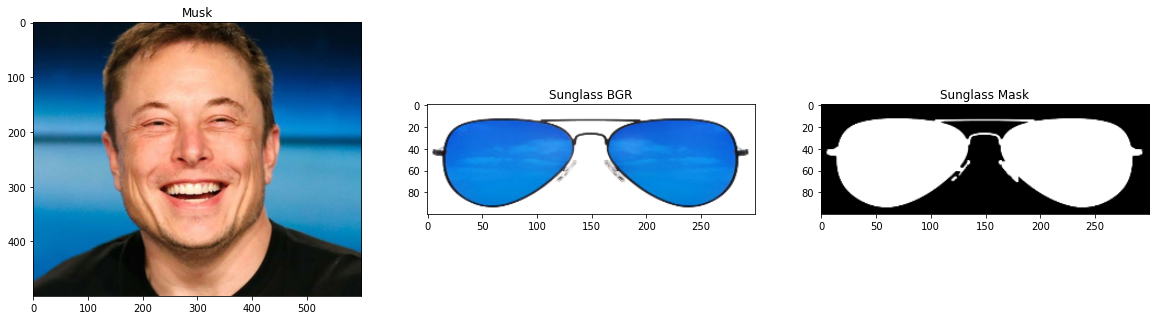

In [45]:
faceImage = cv2.imread(DATA_PATH+"images/musk.jpg",cv2.IMREAD_COLOR)
# faceImage = np.float32(faceImage)/255

glassImage= cv2.imread(DATA_PATH+"images/sunglass.png",cv2.IMREAD_UNCHANGED)
# glassImage = np.float32(glassImage)/255

glassImage=cv2.resize(glassImage,(300,100))
(glassH,glassW,channel)=glassImage.shape

glassBGR = glassImage[:,:,0:3]
glassMask1 = glassImage[:,:,3]

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(faceImage[...,::-1]);plt.title("Musk")
plt.subplot(132);plt.imshow(glassBGR[...,::-1]);plt.title("Sunglass BGR")
plt.subplot(133);plt.imshow(glassMask1,cmap='gray');plt.title("Sunglass Mask")

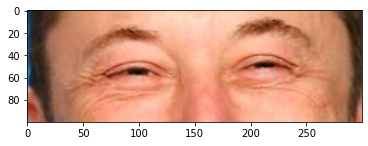

In [46]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Top left corner of the glasses
topLeftRow = 130
topLeftCol = 130

bottomRightRow = topLeftRow + glassH
bottomRightCol = topLeftCol + glassW

# Make a copy
faceWithGlasses = faceImage.copy()

eyeRoi= faceWithGlasses[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]

plt.imshow(eyeRoi[...,::-1])

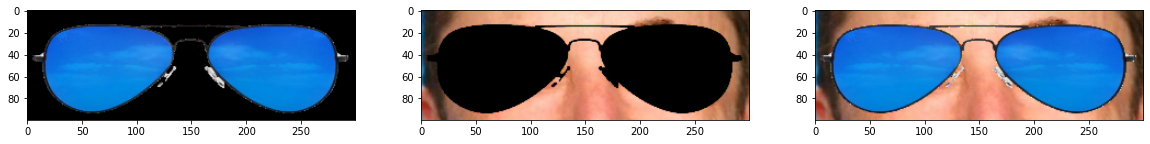

In [47]:
eyeMasked = cv2.bitwise_and(eyeRoi,cv2.bitwise_not(glassMask))

glassMasked = cv2.bitwise_and(glassBGR,glassMask)

eyeFinal = cv2.bitwise_or(eyeMasked,glassMasked)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(glassMasked[...,::-1])
plt.subplot(132);plt.imshow(eyeMasked[...,::-1])
plt.subplot(133);plt.imshow(np.uint8(eyeFinal)[...,::-1])

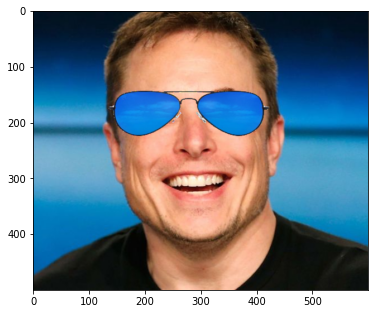

In [48]:
faceWithGlasses[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol] = eyeFinal
plt.imshow(faceWithGlasses[...,::-1])